## Рубежный контроль №1 (Жидков Егор, ИУ5-22М)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from category_encoders.woe import WOEEncoder as ce_WOEEncoder
from sklearn.datasets import load_breast_cancer

pdata = pd.read_csv('./final_book_dataset_kaggle2.csv', sep=",")

In [64]:
pdata.head(10)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
5,Everything Data Analytics: A Beginner's Guide ...,NaN,NaN,NaN,NaN,4.2,31,61%,16%,14%,4%,5%,NaN,NaN,NaN,NaN,NaN,/Everything-Data-Analytics-Beginners-Understan...,https://www.amazon.com/Everything-Data-Analyti...
6,SQL for Data Analysis: Advanced Techniques for...,[ Cathy Tanimura],40.49,40.49,360,4.6,72,75%,18%,2%,2%,2%,6.75 x 0.75 x 8.75 inches,1.2 pounds,English,"O'Reilly Media; 1st edition (October 5, 2021)",978-1492088783,/SQL-Data-Analysis-Techniques-Transforming/dp/...,https://www.amazon.com/SQL-Data-Analysis-Techn...
7,Qualitative Data Analysis: A Methods Sourcebook,"[ Matthew B. Miles, A. Michael Huberman, et al.]",90.00,90,408,4.7,205,84%,9%,4%,2%,NaN,8.5 x 0.92 x 11 inches,2.15 pounds,English,"SAGE Publications, Inc; 4th edition (January 2...",Research in Drama Education,/Qualitative-Data-Analysis-Methods-Sourcebook/...,https://www.amazon.com/Qualitative-Data-Analys...
8,Topological Data Analysis with Applications,"[ Gunnar Carlsson, and , Mikael Vejdemo-Johan...",54.19,53.98 - 54.19,230,5.0,5,100%,NaN,NaN,NaN,NaN,6.75 x 0.75 x 9.75 inches,1.28 pounds,English,Cambridge University Press; 1st edition (March...,978-1108838658,/Topological-Analysis-Applications-Gunnar-Carl...,https://www.amazon.com/Topological-Analysis-Ap...
9,"R in Action, Third Edition: Data analysis and ...",[ Robert I. Kabacoff],56.99,47.97 - 56.99,656,4.3,14,78%,11%,11%,NaN,NaN,7.38 x 1.5 x 9.25 inches,2.62 pounds,English,"Manning; 3rd edition (May 3, 2022)",978-1617296055,/Action-Third-Robert-I-Kabacoff/dp/1617296058/...,https://www.amazon.com/Action-Third-Robert-I-K...


In [65]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

In [66]:
pdata.loc[pdata['avg_reviews'] < 4, 'avg_reviews'] = 0
pdata.loc[pdata['avg_reviews'] >= 4, 'avg_reviews'] = 1.0
pdata = pdata.dropna()

In [67]:
pdata['avg_reviews'].unique()

array([1., 0.])

## Задача №3. Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [68]:
ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(pdata[pdata.columns.difference(['avg_reviews'])], pdata['avg_reviews'])
data_WOE_ENC

,ISBN_13,author,complete_link,dimensions,language,link,n_reviews,pages,price,price (including used books),publisher,star1,star2,star3,star4,star5,title,weight
3,0.000000,0.000000,0.0,0.0,0.07296,0.0,0.000000,0.000000,53.99,0.000000,0.0,0.964416,1.139620,0.481564,0.249763,-0.400825,0.0,-1.093972
4,0.000000,-2.885731,0.0,0.0,0.07296,0.0,-3.984344,-2.885731,24.49,-2.885731,0.0,-3.396557,-2.192584,-0.745665,-0.400825,0.000000,0.0,-2.480266
6,0.000000,0.000000,0.0,0.0,0.07296,0.0,-1.499437,-1.276293,40.49,-1.787119,0.0,0.964416,1.139620,-0.688507,-1.013929,-0.400825,0.0,-1.499437
15,0.000000,0.000000,0.0,0.0,0.07296,0.0,0.000000,0.000000,24.99,-1.787119,0.0,0.964416,0.725187,0.697788,-1.013929,-0.320782,0.0,-1.499437
18,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,19.38,0.000000,0.0,0.640629,0.481564,-0.745665,-1.093972,-0.052518,0.0,-1.787119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.000000,0.000000,0.0,0.0,0.07296,0.0,0.000000,0.000000,9.99,0.000000,0.0,0.964416,0.725187,0.697788,0.249763,-0.583146,0.0,0.000000
807,-0.155702,0.000000,0.0,0.0,0.07296,0.0,0.000000,0.000000,37.99,0.000000,0.0,0.964416,1.139620,0.481564,0.548256,-0.806290,0.0,0.000000
821,0.000000,0.000000,0.0,0.0,0.07296,0.0,0.000000,0.000000,39.02,0.000000,0.0,0.803148,0.964416,-0.113143,-1.276293,-0.939821,0.0,0.000000
825,0.000000,0.000000,0.0,0.0,0.07296,0.0,-1.787119,-1.787119,5.33,0.000000,0.0,0.640629,1.139620,0.697788,-0.583146,-0.320782,0.0,-1.499437


In [69]:
def check_woe_encoding(field):
    data_ones = pdata[pdata['avg_reviews'] == 1].shape[0]
    data_zeros = pdata[pdata['avg_reviews'] == 0].shape[0]
    for s in pdata[field].unique():
        data_filter = pdata[pdata[field]==s]
        if data_filter.shape[0] > 0:
            filter_data_ones = data_filter[data_filter['avg_reviews'] == 1].shape[0]
            filter_data_zeros = data_filter[data_filter['avg_reviews'] == 0].shape[0]
            good = filter_data_ones / data_ones
            bad = filter_data_zeros / data_zeros
            if (bad == 0):
              bad = 10E-5
            woe = np.log(good/bad)
            print(s, '-' , woe)

check_woe_encoding('title')

Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython - 3.8490482062667577
Excel Data Analysis For Dummies (For Dummies (Computer/Tech)) - -inf
SQL for Data Analysis: Advanced Techniques for Transforming Data into Insights - 3.8490482062667577
SQL QuickStart Guide: The Simplified Beginner's Guide to Managing, Analyzing, and Manipulating Data With SQL - 3.8490482062667577
Python para Principiantes: 2 Libros en 1: Programación de Python para principiantes + Libro de trabajo de Python (Spanish Edition) - 3.8490482062667577
Python Tricks: A Buffet of Awesome Python Features - 3.8490482062667577
Think Bayes: Bayesian Statistics in Python (O'reilly) - 3.8490482062667577
Fluent Python: Clear, Concise, and Effective Programming - 3.8490482062667577
Coding Games in Python (Computer Coding for Kids) - 3.8490482062667577
Python for Algorithmic Trading: From Idea to Cloud Deployment - 3.8490482062667577
Robust Python: Write Clean and Maintainable Code - 3.8490482062667577
Learni

/var/folders/cq/n5x29xsd79n1q8qkhrkhk3d40000gn/T/ipykernel_24372/2293209659.py:13: RuntimeWarning: divide by zero encountered in log
  woe = np.log(good/bad)


Python For Dummies - 3.8490482062667577
Python by Example: Learning to Program in 150 Challenges - 3.8490482062667577
Python for Microcontrollers: Getting Started with MicroPython - 3.8490482062667577
Coding for Kids: Python: Learn to Code with 50 Awesome Games and Activities - 3.8490482062667577
Python for Tweens and Teens - 2nd Edition (Black & White Version): Learn Computational and Algorithmic Thinking - 3.8490482062667577
The Python Bible 7 in 1: Volumes One To Seven (Beginner, Intermediate, Data Science, Machine Learning, Finance, Neural Networks, Computer Vision) - 3.8490482062667577
Architecture Patterns with Python: Enabling Test-Driven Development, Domain-Driven Design, and Event-Driven Microservices - 3.8490482062667577
Deep Learning with Python, Second Edition - 3.8490482062667577
Python Programming Language - 3.8490482062667577
The Big Book of Small Python Projects: 81 Easy Practice Programs - 3.8490482062667577
Learning OpenCV 4 Computer Vision with Python 3: Get to grips

## Задача №23. Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

In [70]:

pdata['star5'] = pdata['star5'].str.rstrip('%').astype('float')
pdata['star5'].head(5)

3     75.0
4     52.0
6     75.0
15    72.0
18    73.0
Name: star5, dtype: float64

/var/folders/cq/n5x29xsd79n1q8qkhrkhk3d40000gn/T/ipykernel_24372/156031182.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


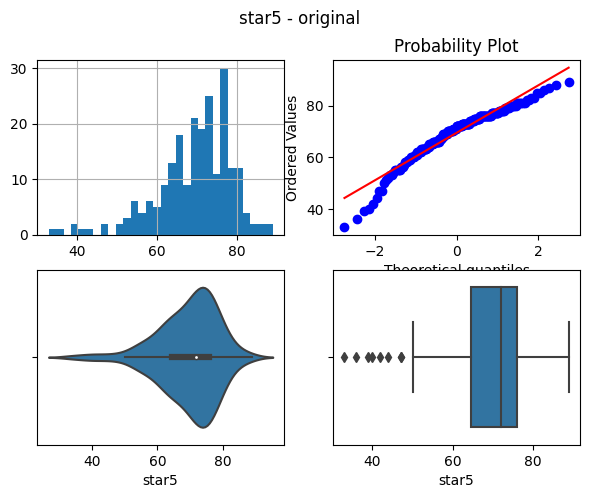

In [73]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(7,5))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

diagnostic_plots(pdata, 'star5', 'star5 - original')

/var/folders/cq/n5x29xsd79n1q8qkhrkhk3d40000gn/T/ipykernel_24372/156031182.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


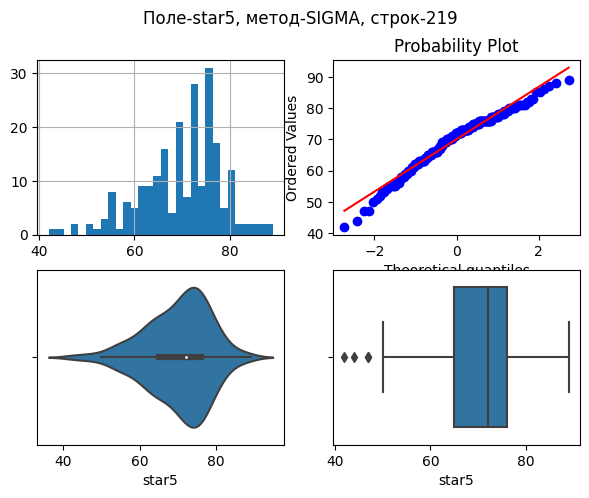

In [77]:
K1 = 3
# Вычисление верхней и нижней границы
lower_boundary = pdata['star5'].mean() - (K1 * pdata['star5'].std())
upper_boundary = pdata['star5'].mean() + (K1 * pdata['star5'].std())
# Флаги для удаления выбросов
outliers_temp = np.where(pdata['star5'] > upper_boundary, True, np.where(pdata['star5'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = pdata.loc[~(outliers_temp)]  
title = 'Поле-{}, метод-{}, строк-{}'.format('star5', 'SIGMA', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'star5', title)

### Pairplot для для колонки Year_of_Release

<Axes: ylabel='Count'>

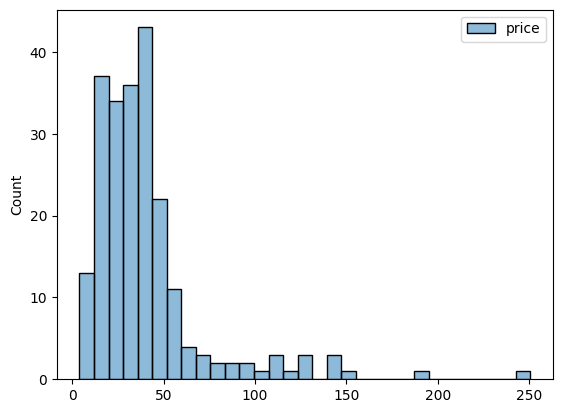

In [79]:
data_tmp = pd.DataFrame(pdata['price'])
sns.histplot(data_tmp)  